# Introduction

In this notebook, we will motivate and implement the **k-Means** algorithm from scratch. This is an **unsupervised learning** algorithm used to cluster your data into **k groups**.

**Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from scipy import stats
import time

# Motivation

**k-Means** is an **iterative** clustering algorithm that works as follows:
1. Choose coordinates (e.g. randomly) for the locations of the k centroids.
2. Group datapoints together by finding the nearast centroid. (There will always be k goups).
3. Calculate the new centre of each centroid by taking the mean position of datapoints in each group.
4. Iterate until the centroids stop moving by a significant amount.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif" width="300">
</center>

k-Means is popular because it is a **reliable** (always converges) and **relatively fast** algorithm. There are three main drawbacks however:
1. You have to manually choose the **value of k**.
2. The resulting **clusters are spherical**.
3. The resulting **clusters are sensitive** to the random initialisation.

There are methods to help in choosing the value of k, like using a **PCA plot** or the **Elbow Method** ([more details](https://www.kaggle.com/code/samuelcortinhas/tps-july-22-unsupervised-clustering)). The second point is a limitation of k-Means that **cannot be avoided**. If your data does not naturually fall into circles/spheres then you might be better of with other clustering methods like **GMMs or Bayesian GMMs** ([more details](https://www.kaggle.com/code/samuelcortinhas/tps-july-22-unsupervised-clustering)).

# Data

We will apply the k-Means algorithm to a **small 2D clustering dataset**.

**Load data**

In [2]:
# Load data
data = pd.read_csv('../input/2d-clustering-data/data.csv')
data.drop('color', axis=1, inplace=True)

# Preview data
print('Dataframe shape:', data.shape)
data.head(3)

Dataframe shape: (336, 2)


,x,y
0,516.012706,393.014514
1,436.211762,408.656585
2,512.052601,372.022014


**Plot data**

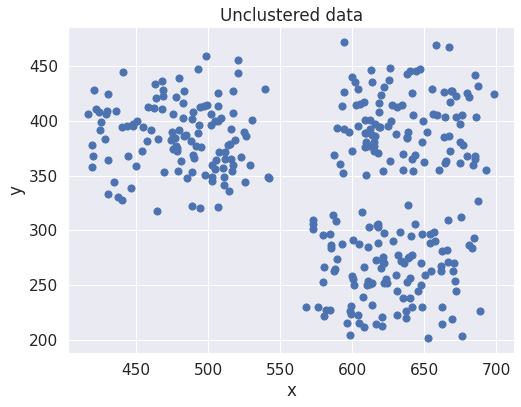

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(x=data['x'], y=data['y'], s=50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Unclustered data')
plt.show()

*Observations:*
    
* There are appear to naturally be 3 clusters to this dataset so we will use k=3.
* This is an unsupervised learning problem. That is, we don't have any labels to learn from.

# k-Means model

We will implement the model as a **class**. Although more complicated, it allows us to write methods like 'fit' and 'predict', which provides more flexibility.

**The algorithm**

In [4]:
class kMeans():
    '''k-Means Clustering'''
    # Initialise
    def __init__(self, k=5, max_iter=100, tol=0.0001):
        self.k= k 
        self.max_iter = max_iter
        self.tol = tol
    
    # Euclidean distance (l2 norm)
    def euclidean(self, v1, v2):
        return np.sqrt(np.sum((v1-v2)**2))
    
    # Train model
    def fit(self, X_train):
        # Save train set for update stage
        self.X_train = X_train
        
        # Sample k points from X for initial centroids
        idx = np.random.randint(len(X_train), size=self.k)
        self.centroids = X_train[idx,:]
        self.clusters = np.zeros(len(X_train))
        
        # Iterate
        for i in range(self.max_iter):
            # Update clusters
            self.update_clusters()

            # Update centroids
            early_stop = self.update_centroids()
            
            # Early stopping if converged
            if early_stop==True:
                print(f'Early stopping occured after {i} iterations')
                break
    
    # Calculate which cluster each point belongs to
    def update_clusters(self):
        for row_idx, train_row in enumerate(self.X_train):
            dist = []
            for i in range(self.k):
                dist.append(self.euclidean(train_row, self.centroids[i]))
            self.clusters[row_idx] = np.argmin(np.array(dist))
        
    # Calculate center of each cluster
    def update_centroids(self):
        # Loop over k clusters
        new_centroids = np.copy(self.centroids)
        for i in range(self.k):
            new_centroids[i] = np.mean(self.X_train[self.clusters==i], axis=0)
        
        # Check for convergence
        if np.linalg.norm(new_centroids-self.centroids)>self.tol:
            self.centroids = new_centroids
            return False
        else:
            self.centroids = new_centroids
            return True
    
    # Make predictions
    def predict(self, X_test):
        predictions = np.zeros(len(X_test))
        for row_idx, test_row in enumerate(X_test):
            dist = []
            for i in range(self.k):
                dist.append(self.euclidean(test_row, self.centroids[i]))
            predictions[row_idx] = np.argmin(np.array(dist))
        return predictions

**Apply our algorithm**

In [5]:
# Apply our k-Means algorithm
model = kMeans(k=3, max_iter=30)
model.fit(data.values)
preds = model.predict(data.values)

Early stopping occured after 4 iterations


**Plot clusters**

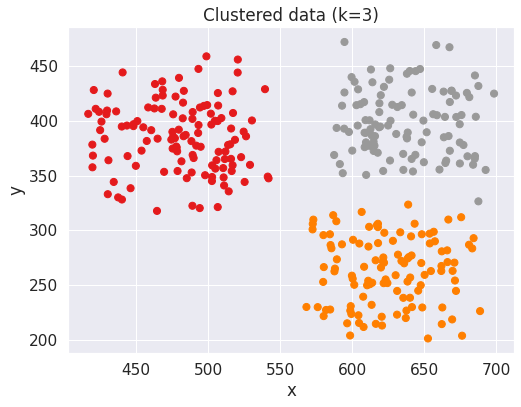

In [6]:
# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(x=data['x'], y=data['y'], c=preds, cmap='Set1', s=50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Clustered data (k=3)')
plt.show()

*Observations:*

* kMeans has done a nice job at clustering this practice dataset because we chose the right value of k.

# Experiments

We end by exploring what happens if we choose bad values of k.

**k too small**

Early stopping occured after 8 iterations


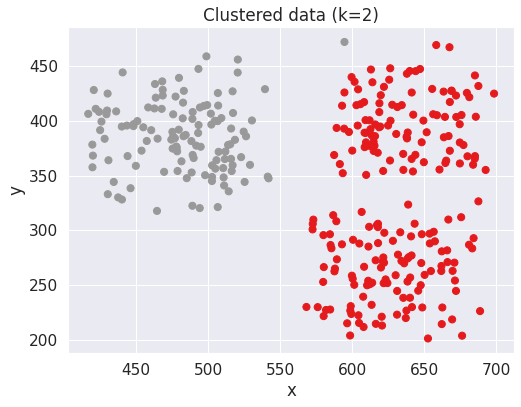

In [7]:
# Apply our k-Means algorithm
model = kMeans(k=2, max_iter=30)
model.fit(data.values)
preds = model.predict(data.values)

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(x=data['x'], y=data['y'], c=preds, cmap='Set1', s=50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Clustered data (k=2)')
plt.show()

**k too large**

Early stopping occured after 9 iterations


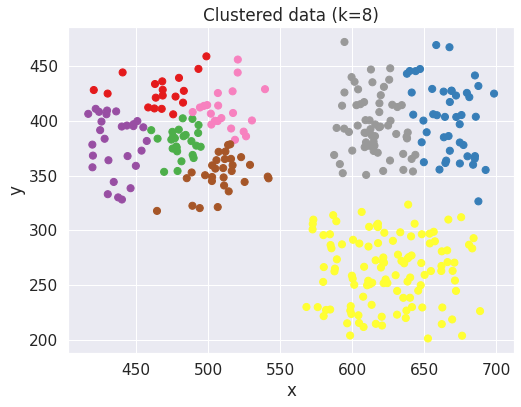

In [8]:
# Apply our k-Means algorithm
model = kMeans(k=8, max_iter=30)
model.fit(data.values)
preds = model.predict(data.values)

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(x=data['x'], y=data['y'], c=preds, cmap='Set1', s=50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Clustered data (k=8)')
plt.show()

Thanks for reading!